# 입문자를 위한, 파이썬/R 데이터 분석  

]

## Today's mission

- 알고리즘 : Decision Tree vs Random Forest
- 알고리즘 : LightGBM & XGBoost(eXtra Gradient Boost)
- 실습 : 경진대회 베이스라인 코드설명

]

## 알고리즘 : LightGBM & XGBoost(eXtra Gradient Boost)

### 1. 개요

- LGBM(Light GBM)

LGBM은 GBM의 한 종류. GBM(Gradient Boosting Algorithm): 회귀분석 또는 분류 분석을 수행할 수 있는 예측모형. 예측모형의 앙상블 방법론 중 부스팅 계열에 속하는 알고리즘. LightGBM, CatBoost, XGBoost : Gradient Boosting Algorithm을 구현한 패키지

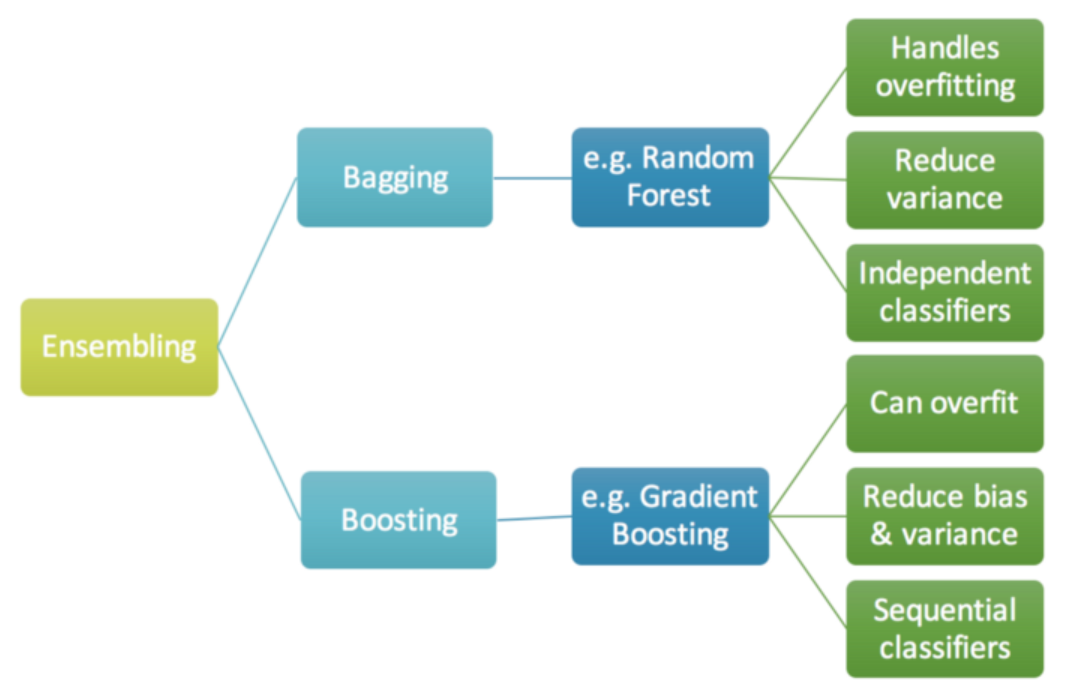

- Boosting의 개념은 약한 분류기를 결합하여 강한 분류기를 만드는 과정

분류기 A, B, C 가 있고, 각각이 0.2 정도의 accuracy를 보여준다고 하면 A, B, C를 결합하여 더 높은 정확도(약 0.7의 accuracy)를 얻는 게 앙상블 알고리즘의 기본 원리다. Boosting은 이 과정을 순차적으로 실행하는데 A 분류기를 만든 후, 그 정보를 바탕으로 B 분류기를 만들고, 다시 그 정보를 바탕으로 C 분류기를 만든다. 결과적으로는 만들어진 모든 분류기를 결합해 최종 모델을 만든다.

- XGBoost vs. LGBM

XGboost는 학습 시간이 오래 걸린다. Grid search를 통해 최적의 파라미터를 탐색한다면 학습 시간의 효율을 고려해야 한다. LGBM은 XGBoost보다 학습 시간이 덜 걸리며 메모리 사용도 작다는 장점이 있다. 둘 다 좋은 알고리즘이므로 특별히 어느 하나가 좋다고 할 수는 없다. 단, LGBM은 데이터셋의 과적합을 조심해야 하는데, 1만개 이하의 데이터셋은 과적합 위험이 있다.

- LGBM의 leaf wise 방식

일반적인 GBM 패키지와 다르게 LGBM은 leaf wise방식을 사용한다. 기존의 트리기반 알고리즘은 트리의 깊이를 줄이기 위해 level wise(균형 트리 분할)를 사용한다면 LGBM은 leaf wise(리프 중심 트리 분할)를 이용한다. 앞의 level wise는 트리를 균형적으로 분할하는데 균형작업이 추가로 들어간다고 보면 된다. LGBM은 균형적으로 트리를 분할하지 않는 대신 최대 손실값(max delta loss)을 갖는 트리 노드를 계속 분할한다. 이 때문에 비대칭적으로 어느 트리는 깊이가 아주 깊어지게 된다. 이 방식은 균형 트리 분할보다 오류를 최소화할 수 있다.

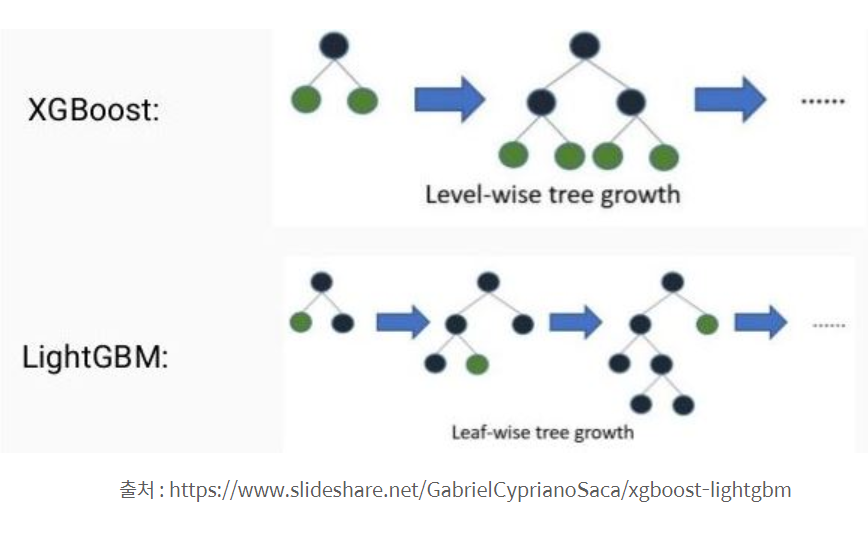

##### xgboost와 lgbm의 차이
- 주요 hyper parameter
1. n_estimators : default=100, 반복하려는 트리의 갯수
2. learning_rate : 0~1사이 값 지정. gradient descent에서 얼마나 움직일 것인지 설정한다. 간단히 학습률이라고 생각하면 된다.
3. max_depth : default=-1, 최대 깊이를 조절
4. min_child_samples : default=20, leaf node로 분류되기 위한 최소 데이터 수
5. num_leaves : default=31, one tree가 가질 수 있는 leaf 갯수
6. boost : default=gbdt, gbdt는 gradient descent를 의미. rt는 random forest
7. reg_lambda : L2 규제 적용
8. leg_alpha : L1 규제

##### 한계와 반성
- 데이터 전처리 과정에서의 한계

1. 데이터를 팀원들과 분할해서 전처리한 후 통합 과정에서 PCA를 전체 데이터에 대해서 진행하지 않았다. PCA는 각자 진행할 필요가 없다.
2. D, M 항목들을 더 자세히 처리할 수 있었다. 전처리 과정에서 사용한 기법들을 서로 공유하거나 한 사람이 총괄할 필요가 있다.
3. 전처리를 잘 해 놓고도 최종 데이터셋으로 통합하는 과정에서 발생했다고 추정되는 오류로 인해 사용하지 못한 col들이 있다. 전처리에 너무 많은 시간을 소모하여 오류를 수정할 시간이 없었던 것으로 판단된다.

- 분석 과정에서의 한계

1. 최종 데이터셋이 늦게 확정되어 최적의 파라미터를 찾는 효과적인 방법(grid search 등)을 사용하지 못했다. 전처리 과정만큼이나 중요하고 오래 걸리는 것이 분석 과정이란 점을 명심해야 한다.
2. Smote를 사용해서 데이터의 불균형을 맞추는 것도 좋지만, 다른 방법들도 시도해 볼 수 있었다. 예를 들어 부족한 사기 데이터에 대해 undersampling을 진행한 후, 모든 비사기 데이터를 고려할 수 있도록 때까지 데이터셋을 여러개 만드는 방법 등이 있다.

(cf) [SMOTE알고리즘](https://mkjjo.github.io/python/2019/01/04/smote_duplicate.html)은 오버샘플링 기법 중 합성데이터를 생성하는 방식으로 가장 많이 사용되고 있는 모델이다. SMOTE(synthetic minority oversampling technique)란, 합성 소수 샘플링 기술로 다수 클래스를 샘플링하고 기존 소수 샘플을 보간하여 새로운 소수 인스턴스를 합성해낸다.
일반적인 경우 성공적으로 작동하지만, 소수데이터들 사이를 보간하여 작동하기 때문에 모델링셋의 소수데이터들 사이의 특성만을 반영하고 새로운 사례의 데이터 예측엔 취약할 수 있다.

### 2. [분류] LightGBM

#### LightGBM의 장단점
- LightGBM의 장점

(1) XGBoost 대비 더 빠른 학습과 예측 수행 시간

(2) 더 작은 메모리 사용량

(3) 카테고리형 피처의 자동 변환과 최적 분할 : 원-핫인코딩 등을 사용하지 않고도 카테고리형 피처를 최적으로 변환하고 이에 따른 노드분할 수행

- LightGBM의 단점

적은 데이터 세트에 적용할 경우 과적합이 발생하기 쉽습니다.  (공식 문서상 대략 10,000건 이하의 데이터 세트)

- 기존 GBM과의 차이점

    일반적인 균형트리분할 (Level Wise) 방식과 달리 리프중심 트리분할(Leaf Wise) 방식을 사용합니다.
    * 균형트리분할은 최대한 균형 잡힌 트리를 유지하며 분할하여 트리의 깊이를 최소화하여
오버피팅에 강한구조이지만 균형을 맞추기 위한 시간이 필요합니다.
    * 리프중심 트리분할의 경우 최대 손실 값을 가지는 리프노드를 지속적으로 분할하면서
트리가 깊어지고 비대칭적으로 생성합니다. 이로써 예측 오류 손실을 최소화하고자 합니다.

#### LightGBM의 하이퍼 파라미터

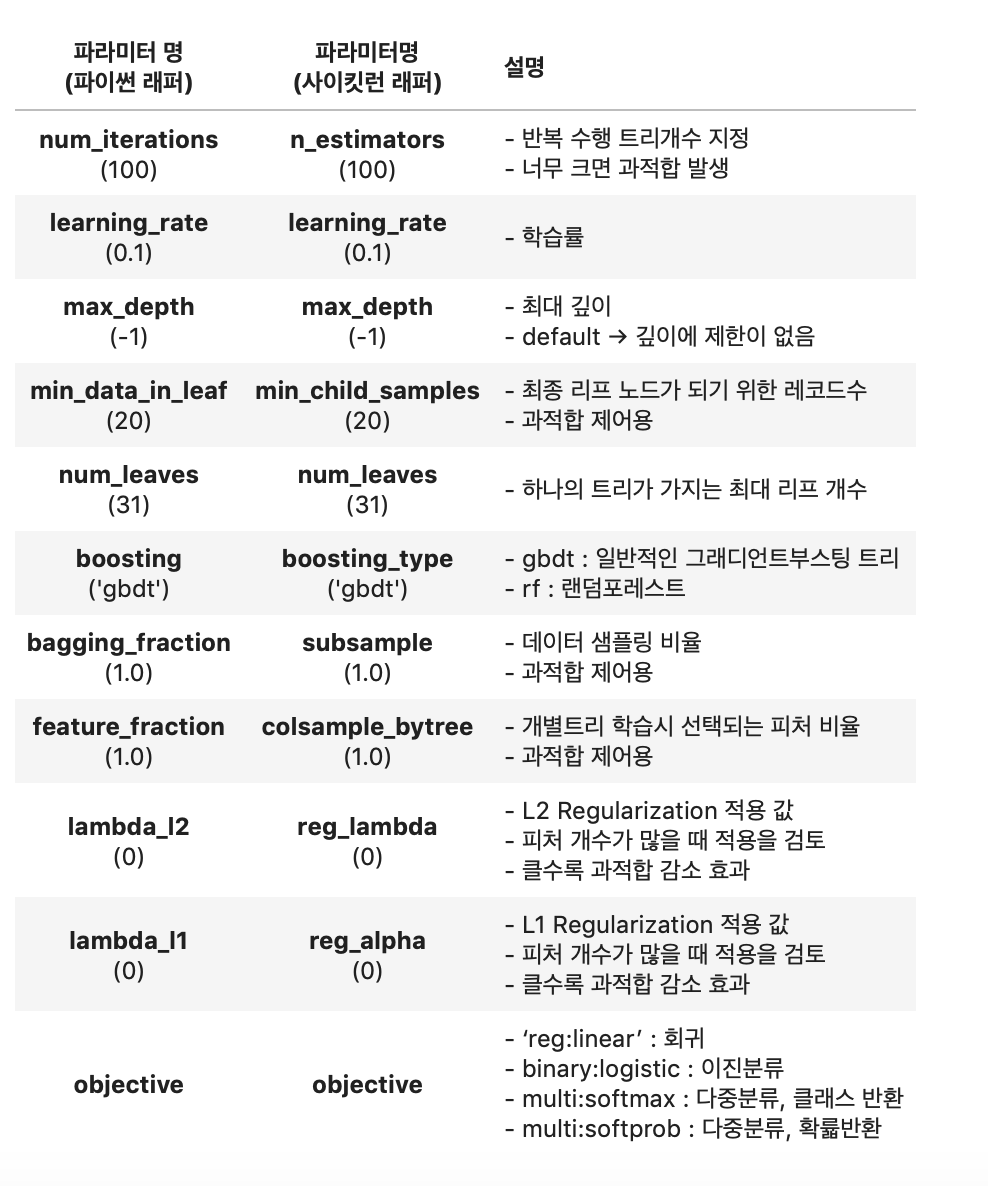

#### 하이퍼 파라미터 튜닝방안

num_leaves의 개수를 중심으로 min_child_sampes(min_data_in_leaf), max_depth를
함께 조절하면서 모델의 복잡도를 줄이는 것이 기본 튜닝 방안입니다.

- num_leaves를 늘리면 정확도가 높아지지만 트리가 깊어지고 과적합되기 쉬움
- min_child_samples(min_data_in_leaf)를 크게 설정하면 트리가 깊어지는 것을 방지
- max_depth는 명시적으로 깊이를 제한. 위의 두 파라미터와 함께 과적합을 개선하는데 사용

또한, learning_rate을 줄이면서 n_estimator를 크게하는 것은 부스팅에서의 기본적인 튜닝 방안

#### (예제) 위스콘신 유방암 예측

LightGBM에서도 위스콘신 유방암 데이터 세트를 이용해 예측을 해보겠습니다.

In [ ]:
#!pip install lightgbm

In [ ]:
# LightGBM 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
# 위스콘신 유방암 데이터 로드
dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

In [ ]:
ftr

In [ ]:
target

In [ ]:
# LGBM 분류기 객체 생성
lgbm_wrapper = LGBMClassifier(n_estimators=400)
lgbm_wrapper

In [ ]:
# 학습, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size=0.2)

In [ ]:
# 조기 중단 기능에 필요한 파라미터 정의
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, eval_metric='logloss', eval_set=evals)#, early_stopping_rounds=100)

In [ ]:
preds = lgbm_wrapper.predict(X_test)
preds

In [ ]:
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]
#print(pred_proba)

In [ ]:
print(np.round(pred_proba[:10], 3))
# 위 LGBM 분류기의 n_estimtor를 400으로 지정했지만 조기중단 기능을 통해 142번째 학습에서 중단된 것을 확인할 수 있습니다.

In [ ]:
# 다양한 오차 측정 지표를 확인하기 위한 함수 정의
from sklearn.metrics import *

def get_clf_eval(y_test, pred=None, pred_proba=None): 
    confusion = confusion_matrix(y_test, pred) 
    accuracy = accuracy_score(y_test, pred) 
    precision = precision_score(y_test, pred) 
    recall = recall_score(y_test, pred) 
    f1 = f1_score(y_test, pred) 
    # ROC AUC 
    roc_auc = roc_auc_score(y_test, pred_proba) 

    print('Confusion Matrix') 
    print(confusion) 
    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, f1: {3:.4f}, roc_auc: {4:.4f}'.format( accuracy, precision, recall, f1, roc_auc))

In [ ]:
# get_clf_eval()를 이용
get_clf_eval(y_test, preds, pred_proba)

#### LGBM 피처 중요도 시각화

In [ ]:
dataset.data

In [ ]:
# plot_importance() 를 이용한 피처 즁요도 시각화

from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

### 3. [분류] XGBoost(eXtra Gradient Boost)

트리 기반의 알고리즘의 앙상블 학습에서 각광받는 알고리즘 중 하나입니다.
GBM에 기반하고 있지만, GBM의 단점인 느린 수행시간, 과적합 규제 등을 해결한 알고리즘입니다.

- XGBoost의 주요장점   

(1) 뛰어난 예측 성능  

(2) GBM 대비 빠른 수행 시간  

(3) 과적합 규제(Overfitting Regularization)    

(4) Tree pruning(트리 가지치기) : 긍정 이득이 없는 분할을 가지치기해서 분할 수를 줄임  

(5) 자체 내장된 교차 검증 :

    * 반복 수행시마다 내부적으로 교차검증을 수행해 최적회된 반복 수행횟수를 가질 수 있음
    * 지정된 반복횟수가 아니라 교차검증을 통해 평가 데이트세트의 평가 값이 최적화되면 반복을 중간에 멈출 수 있는 기능이 있음
    
(6) 결손값 자체 처리

XGBoost는 독자적인 XGBoost 모듈과 사이킷런 프레임워크 기반의 모듈이 존재합니다.
독자적인 모듈은 고유의 API와 하이퍼파라미터를 사용하지만, 사이킷런 기반 모듈에서는 다른 Estimator와 동일한 사용법을 가지고 있습니다.

#### XGBoost의 하이퍼 파라미터
- 일반 파라미터
: 일반적으로 실행 시 스레드의 개수나 silent 모드 등의 선택을 위한 파라미터, default 값을 바꾸는 일은 거의 없음

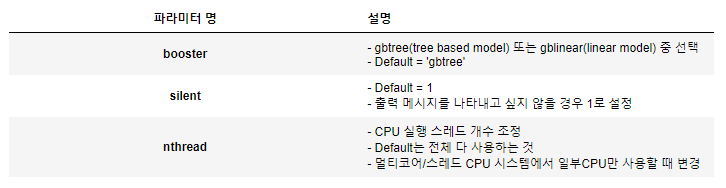

#### 주요 부스터 파라미터 : 트리 최적화, 부스팅, regularization 등과 관련된 파라미터를 지칭

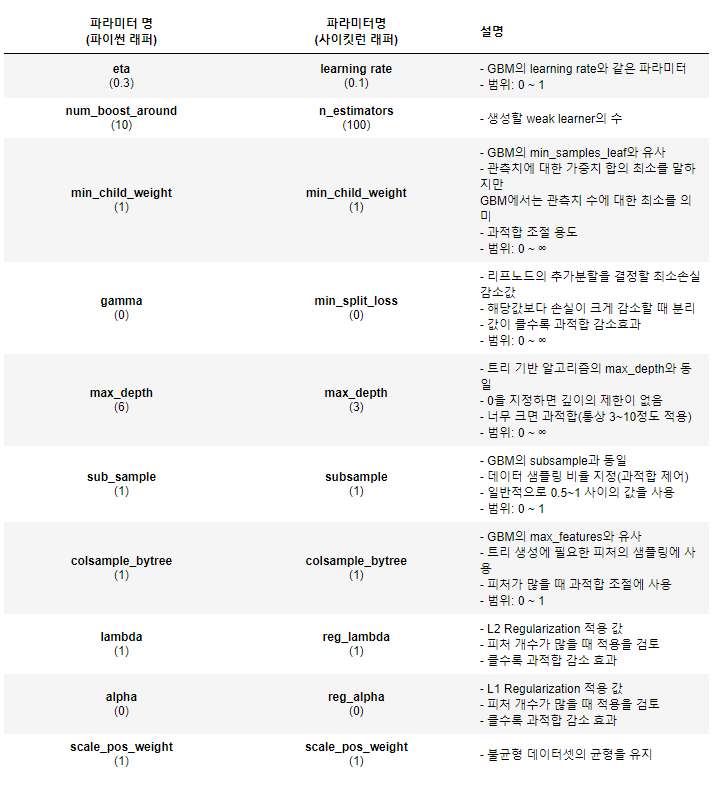

#### 학습 태스크 파라미터 : 학습 수행 시의 객체함수, 평가를 위한 지표 등을 설정하는 파라미터

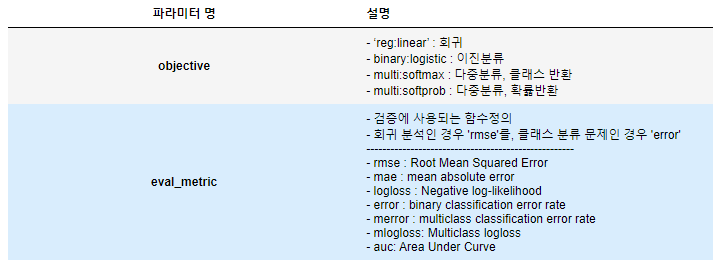

- 참고 : 
> softmax: 다항 분류 문제의 경우 소프트맥스(Softmax)를 사용해서 분류하는데 반횐되는 값이 예측확률이 아니라 클래스임 -  [소프트맥스](https://m.blog.naver.com/wideeyed/221021710286)
> softprob: 각 클래스 범주에 속하는 예측확률을 반환함

#### 과적합 제어
- eta 값을 낮춥니다.(0.01 ~ 0.1) → eta 값을 낮추면 num_boost_round(n_estimator)를 반대로 높여주어야 합니다.
- max_depth 값을 낮춥니다.
- min_child_weight 값을 높입니다.
- gamma 값을 높입니다.
- subsample과 colsample_bytree를 낮춥니다.

※ Early Stopping 기능 :
* GBM의 경우 n_estimators에 지정된 횟수만큼 학습을 끝까지 수행하지만, XGB의 경우 오류가 더 이상 개선되지 않으면 수행을 중지
* n_estimators 를 200으로 설정하고, 조기 중단 파라미터 값을 50으로 설정하면, 1부터 200회까지 부스팅을 반복하다가 50회를 반복하는 동안 학습오류가 감소하지 않으면 더 이상 부스팅을 진행하지 않고 종료합니다.
(가령 100회에서 학습오류 값이 0.8인데 101~150회 반복하는 동안 예측 오류가 0.8보다 작은 값이 하나도 없으면 부스팅을 종료)

#### (예제) 위스콘신 유방암 예측

파이썬 래퍼 XGBoost 적용 위스콘신 유방암 데이터 세트를 활용한 API 사용법

In [ ]:
#!pip install xgboost

In [ ]:
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

In [ ]:
X_features

In [ ]:
y_label

In [ ]:
cancer_df = pd.DataFrame(data=X_features, columns = dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(3)

# 위의 데이터셋에서 악성종양은 0, 양성은 1 값으로 되어 있음

In [ ]:
print(dataset.target_names)

In [ ]:
print(cancer_df['target'].value_counts())

In [ ]:
# 전체 데이터셋을 학습용 80%, 테스트용 20%로 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

파이썬래퍼 XGBoost와 사이킷런래퍼 XGBoost의 가장 큰 차이는  
파이썬래퍼는 학습용과 테스트 데이터 세트를 위해 별도의 DMatrix를 생성한다는 것입니다.  
DMatrix : 넘파이 입력 파라미터를 받아서 만들어지는 XGBoost만의 전용 데이터 세트

- 주요 입력 파라미터는 data(피처 데이터 세트)와 label
(분류: 레이블 데이터 세트/회귀: 숫자형인 종속값 데이터 세트)
- 판다스의 DataFrame으로 데이터 인터페이스를 하기 위해서는 DataFrame.values를 이용해 넘파이로 일차변환 한 뒤에 DMatrix 변환을 적용

In [ ]:
# 넘파이 형태의 학습 데이터 세트와 테스트 데이터를 DMatrix로 변환하는 예제
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
dtrain

In [ ]:
# max_depth = 3, 학습률은 0.1, 예제가 이진분류이므로 목적함수(objective)는 binary:logistic(이진 로지스틱)
# 오류함수의 평가성능지표는 logloss
# 부스팅 반복횟수는 400
# 조기중단을 위한 최소 반복횟수는 100

params = {'max_depth' : 3,
         'eta' : 0.1, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'logloss',
         'early_stoppings' : 100 }

num_rounds = 400

In [ ]:
type(params)

파이썬래퍼 XGBoost에서 하이퍼 파라미터를 xgboost 모듈의 train( ) 함수에 파라미터로 전달합니다.  
(사이킷런 래퍼는 Estimator 생성자를 하이퍼 파라미터로 전달)

early_stopping_rounds 파라미터 : 조기 중단을 위한 라운드를 설정합니다.
조기 중단 기능 수행을 위해서는 반드시 eval_set과 eval_metric이 함께 설정되어야 합니다.

- eval_set : 성능평가를 위한 평가용 데이터 세트를 설정
- eval_metric : 평가 세트에 적용할 성능 평가 방법
(반복마다 eval_set으로 지정된 데이터 세트에서 eval_metric의 지정된 평가 지표로 예측 오류를 측정)


train() 함수를 호출하면 xgboost가 반복 시마다 evals에 표시된 데이터 세트에 대해 평가 지표를 출력합니다.
그 후 학습이 완료된 모델 객체를 반환합니다.

In [ ]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval' 로 명기
wlist = [(dtrain, 'train'), (dtest,'eval')]

In [ ]:
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

train( ) 을 통해 학습을 수행하면 반복시 train-logloss와 eval-logloss가 지속적으로 감소합니다.

xgboost를 이용해 학습이 완료됐으면 predict() 메서드를 이용해 예측을 수행합니다.

여기서 파이썬 래퍼는 예측 결과를 추정할 수 있는 호가률 값을 반환합니다.(반면 사이킷런 래퍼는 클래스 값을 반환)

In [ ]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

In [ ]:
# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

In [ ]:
# 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 불러오기
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [ ]:
get_clf_eval(y_test, preds)

Feature importance를 시각화할 때,  
→ 기본 평가 자료로 f1스코어를 기반으로 각 feature의 중요도를 나타냅니다.  
→ 사이킷런 래퍼는 estimator 객체의 feature_importances 속성을 이용해 시각화 코드를 직접 작성해야 합니다.  
→ 반면, 파이썬 래퍼는 plot_importance()를 이용해 바로 피처 중요 코드를 시각화 할 수 있습니다.

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

다만, xgboost 넘파이 기반의 피처 데이터로 학습 시에 피처명을 제대로 알 수 없으므로  
피처별로 f자 뒤에 순서를 붙여 X축에 피처들로 나열합니다.(f0는 첫번째 피처, f1는 두번째 피처를 의미)

### 파이썬 래퍼의 교차 검증 수행 및 최적 파라미터 구하기
: xgboost는 사이킷런의 GridSearchCV와 유사하게 cv( )를 API로 제공합니다.

xgb.cv(params, dtrain, num_boost_round=10, nfold=3, stratified=False,  
folds=None, metrics=(),obj=None, feval=None, maximize=False,  
early_stopping_rounds=None, fpreproc=None, as_pandas=True,  
verbose_eval=None, show_stdv=True, seed=0, callbacks=None, shuffle=True)

- params(dict): 부스터 파라미터
- dtrain(DMatrix) : 학습 데이터
- num_boost_round(int) : 부스팅 반복횟수
- nfold(int) : CV폴드 개수
- stratified(bool) : CV수행시 샘플을 균등하게 추출할지 여부
- metrics(string or list of strings) : CV 수행시 모니터링할 성능 평가 지표
- early_stopping_rounds(int) : 조기중단을 활성화시킴. 반복횟수 지정

xgv.cv의 반환 값은 데이터프레임 형태입니다.

In [ ]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_rounds,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=100
)
cv_results

### 사이킷런 래퍼 XGBoost의 개요 및 적용

> 특징
- 사이킷런의 기본 Estimator를 이용해 만들어 fit()과 predict()만으로 학습과 예측이 가능
- GridSearchCV,Pipeline 등 사이킷런의 유틸리티를 그대로 사용 가능
- 분류 : XGBClassifier / 회귀 : XGBRegressor

> 파이썬 래퍼와 비교시 달라진 파라미터
- eta → learning_rate
- sub_sample → subsample
- lambda → reg_lambda
- alpha → reg_alpha
- num_boost_round → n_estimators

위와 동일하게 위스콘신 유방암 데이터를 통한 예측

In [ ]:
#!pip install --user lightgbm==3.3.2

In [ ]:
import lightgbm

print(lightgbm.__version__)

In [ ]:
# max_depth = 3, 학습률은 0.1, 예제가 이진분류이므로 목적함수(objective)는 binary:logistic(이진 로지스틱)
# 부스팅 반복횟수는 400
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)

In [ ]:
# 예측 결과 확인
get_clf_eval(y_test, w_preds)

앞선 파이썬 래퍼 XGBoost와 동일한 결과가 나옵니다.

사이킷런 래퍼 XGBoost에서도 조기 중단 기능을 수행할 수 있는데 fit( )에 해당 파라미터를 입력하면 됩니다.  
→ early_stopping_rounds, eval_metrics, eval_set

In [ ]:
# max_depth = 3, 학습률은 0.1, 예제가 이진분류이므로 목적함수(objective)는 binary:logistic(이진 로지스틱)
# 오류함수의 평가성능지표는 logloss
# 부스팅 반복횟수는 400
# 조기중단을 위한 최소 반복횟수는 100

# 아래 예제에서는 평가를 위한 데이터 세트로 테스트 데이터 세트를 사용했지만, 바람직하진 않습니다.
# 테스트 데이터 세트는 학습에 완전히 알려지지 않은 데이터 세트를 사용해야 합니다.
# 평가에 테스트 데이터 세트를 사용하면 학습시에 미리 참고가 되어 과적합할 수 있기 때문입니다.

xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1 , max_depth = 3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, #early_stopping_rounds = 100, 
                #eval_metric="logloss", 
                eval_set = evals, verbose=True)

In [ ]:
ws100_preds = xgb_wrapper.predict(X_test)

위의 결과에서는 211번 반복시 logloss가 0.085593 이었는데 이후 100번 반복되는 311번째까지  
성능평가 지수가 향상되지 않았기 때문에 더 이상 반복하지 않고 멈추게 되었습니다.

In [ ]:
get_clf_eval(y_test, ws100_preds)

조기 중단값을 너무 급격하게 줄이면 성능이 향상될 여지가 있음에도 학습을 멈춰 예측 성능이 저하될 수 있습니다.

In [ ]:
# early_stopping_rounds = 10 으로 설정하고 재학습
xgb_wrapper.fit(X_train, y_train, #early_stopping_rounds = 10, 
                #eval_metric='logloss', 
                eval_set=evals , verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
get_clf_eval(y_test, ws10_preds)

62번째까지만 수행이 되고 종료되었는데, 이렇게 학습된 모델로 예측한 결과, 정확도는 약 0.9561로  
ealry_stopping_rounds = 100일 때의 정확도인 0.9649보다 낮게 나왔습니다.

모델 예측 후 피처 중요도를 동일하게 plot_importance() API를 통해 시각화할 수 있습니다.

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))

plot_importance(xgb_wrapper, ax=ax)